In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
import pickle

In [75]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_03948c0ad8cd4cd0b0079429dc89c0e4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7bKvgV9F9IISSEP0qmcXjzCkArXL5dXPuIEWyayfV6NB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_03948c0ad8cd4cd0b0079429dc89c0e4.get_object(Bucket='winequalityprediction-donotdelete-pr-roc70aepp5j1jf',Key='winequalityN.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head()
                   

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [76]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [77]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [79]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [80]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [81]:

plt.figure(figsize=(12,5))
sns.distplot(data['alcohol'],color='r')
plt.show()

In [82]:
df_cat = data.select_dtypes(include='object')
df_cat.head()

type
0  white
1  white
2  white
3  white
4  white

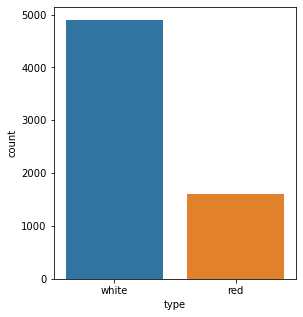

In [83]:
plt.figure(figsize=(20,5))
for i,j in enumerate(df_cat):
    plt.subplot(1,4,i+1)
    sns.countplot(data[j])   

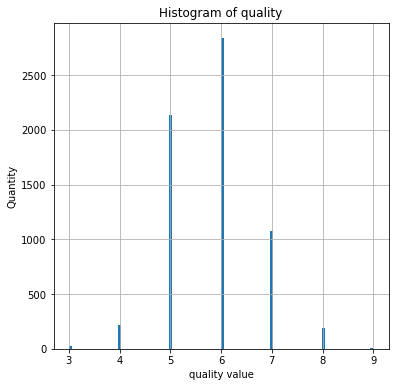

In [84]:
axarr = data.hist(column=['quality'], bins=100, figsize=(6, 6))
ax = axarr.flatten()[0]
ax.set_xlabel(f"{ax.get_title()} value")
ax.set_ylabel("Quantity")
title = ax.get_title()
ax.set_title(f"Histogram of {title}")
plt.show()

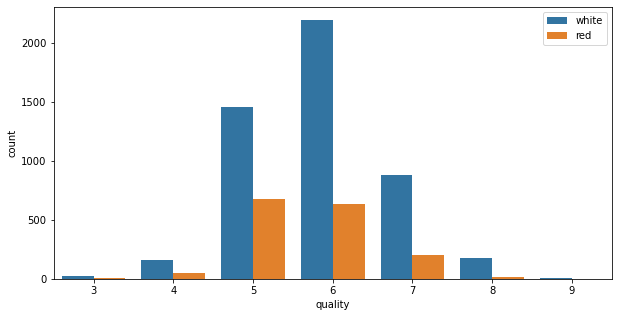

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(data['quality'],hue=data['type'])
plt.legend(loc='upper right')


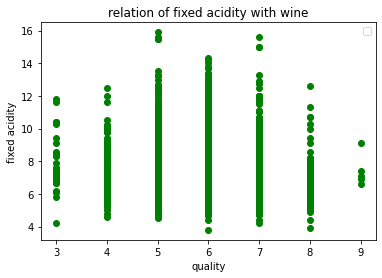

In [86]:
plt.scatter(data['quality'], data['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

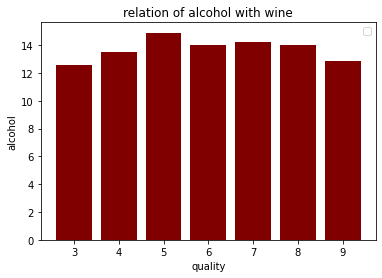

In [87]:
plt.bar(data['quality'], data['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

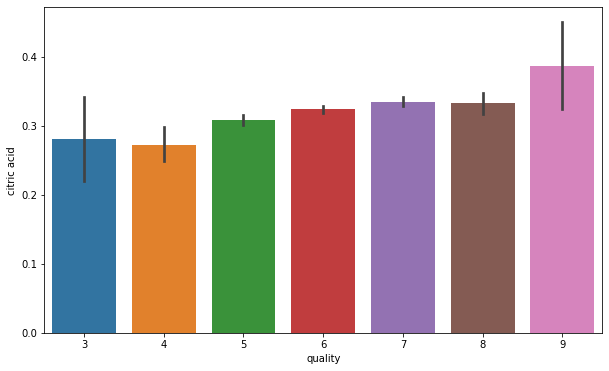

In [88]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

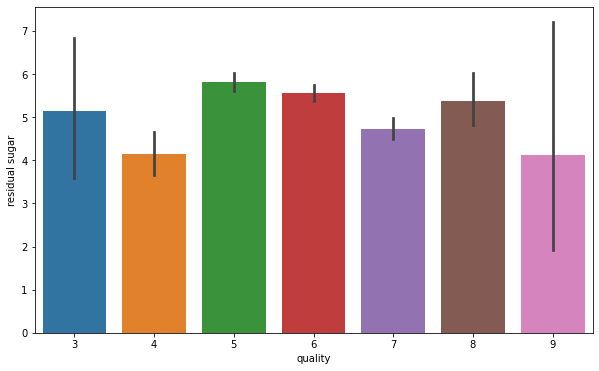

In [89]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

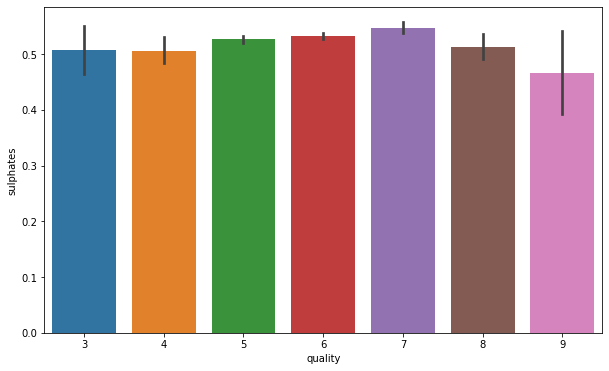

In [90]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

In [91]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)


<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

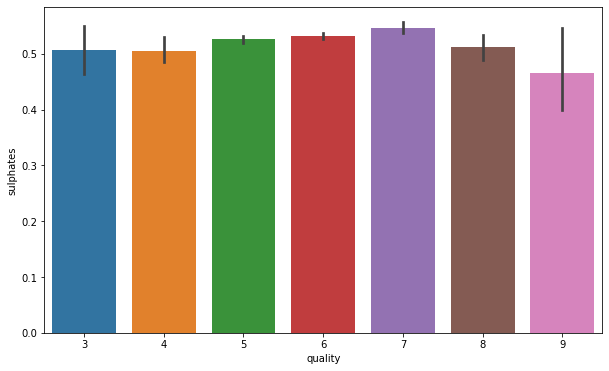

In [92]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

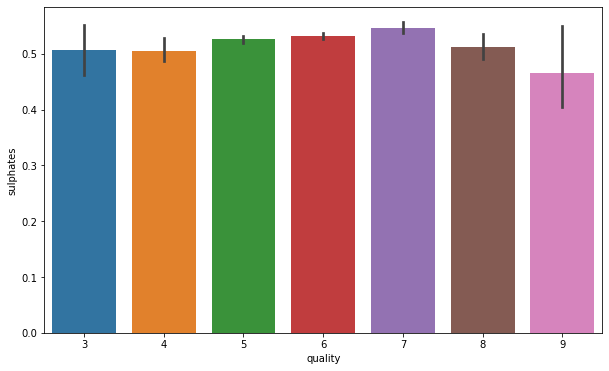

In [93]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

<AxesSubplot:>

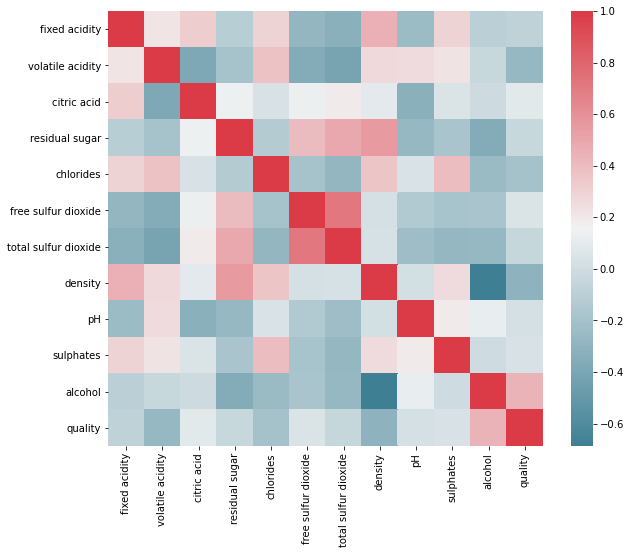

In [94]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

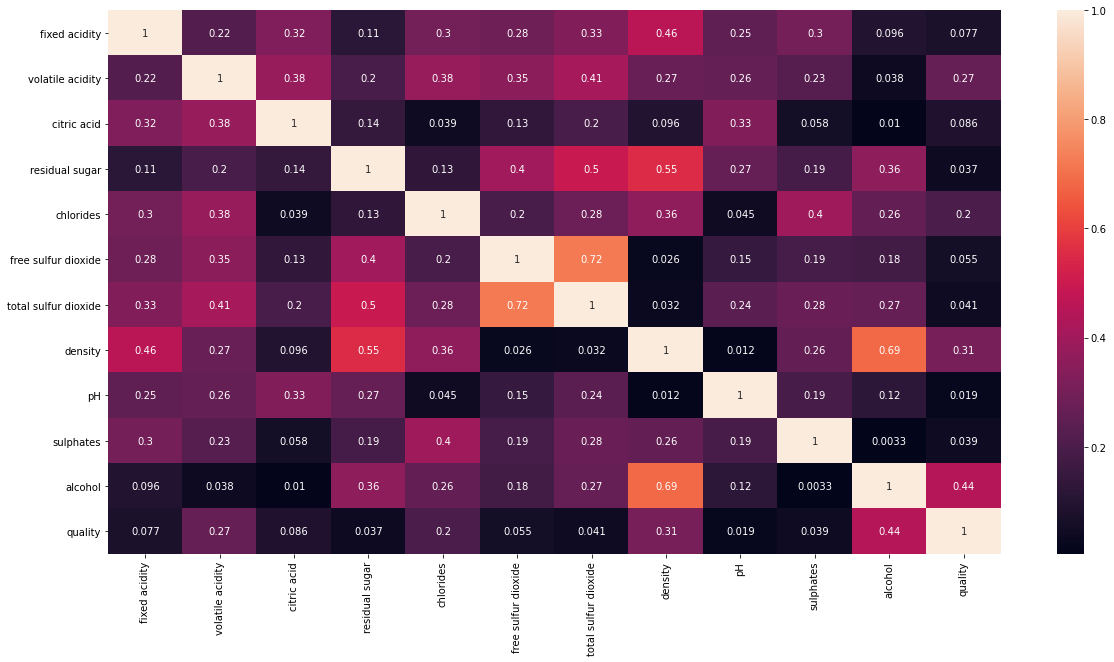

In [95]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr().abs(), annot = True)
plt.show()

In [96]:
plt.figure(figsize=(15,7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

In [97]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [98]:
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [99]:
data=data.drop(['volatile acidity','total sulfur dioxide','chlorides','density'],axis=1)
print(data.shape)

(6497, 9)


In [100]:
data['quality']=data['quality'].map({3:'bad',4:'bad',5:'bad',6:'good',7:'good',8:'good'})
data['quality'].value_counts()

good    4108
bad     2384
Name: quality, dtype: int64

In [101]:
data['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [102]:
data.isnull().any()

type                   False
fixed acidity           True
citric acid             True
residual sugar          True
free sulfur dioxide    False
pH                      True
sulphates               True
alcohol                False
quality                 True
dtype: bool

In [103]:
data.isnull().sum()

type                    0
fixed acidity          10
citric acid             3
residual sugar          2
free sulfur dioxide     0
pH                      9
sulphates               4
alcohol                 0
quality                 5
dtype: int64

In [104]:
data["fixed acidity"].fillna(data["fixed acidity"].mean(),inplace=True)
data["sulphates"].fillna(data["sulphates"].mean(),inplace=True)
data["pH"].fillna(data["pH"].mean(),inplace=True)
data["residual sugar"].fillna(data["residual sugar"].mean(),inplace=True)
data["citric acid"].fillna(data["citric acid"].mean(),inplace=True)
data["quality"].fillna(data["quality"].mode()[0],inplace=True)

In [105]:
data.isnull().any()

type                   False
fixed acidity          False
citric acid            False
residual sugar         False
free sulfur dioxide    False
pH                     False
sulphates              False
alcohol                False
quality                False
dtype: bool

In [106]:
le=LabelEncoder()
data['quality']=le.fit_transform(data['quality'])
data['type']=le.fit_transform(data['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

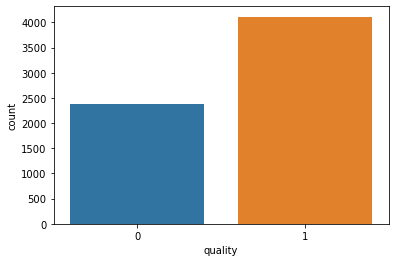

In [107]:
sns.countplot(data['quality'])

In [108]:
x=data.iloc[:,:8]
y=data.iloc[:,8:9]
print(x.shape)
print(y.shape)

(6497, 8)
(6497, 1)


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4872, 8)
(4872, 1)
(1625, 8)
(1625, 1)


In [110]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [111]:

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Training accuracy : 0.7066912972085386
Testing accuracy : 0.6904615384615385
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       584
           1       0.74      0.80      0.77      1041

    accuracy                           0.69      1625
   macro avg       0.66      0.65      0.65      1625
weighted avg       0.68      0.69      0.69      1625

[[294 290]
 [213 828]]


In [112]:

model = SGDClassifier(penalty=None)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54       584
           1       0.74      0.78      0.76      1041

    accuracy                           0.68      1625
   macro avg       0.65      0.65      0.65      1625
weighted avg       0.68      0.68      0.68      1625



In [113]:

model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))


Training accuracy : 0.7676518883415435
Testing accuracy : 0.7304615384615385


In [114]:
param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [115]:
#grid_svc.fit(x_train, y_train)

In [116]:
#grid_svc.best_params_

In [117]:
model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       584
           1       0.76      0.84      0.80      1041

    accuracy                           0.73      1625
   macro avg       0.71      0.69      0.69      1625
weighted avg       0.72      0.73      0.72      1625



In [118]:

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7095384615384616


In [119]:

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.59      0.64      0.61       584
           1       0.79      0.75      0.77      1041

    accuracy                           0.71      1625
   macro avg       0.69      0.69      0.69      1625
weighted avg       0.72      0.71      0.71      1625

[[371 213]
 [259 782]]


In [120]:
model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.7508230383411317

In [121]:

rfmodel = RandomForestClassifier(n_estimators = 200)
rfmodel.fit(x_train, y_train)
y_pred = rfmodel.predict(x_test)
print("Training accuracy :", rfmodel.score(x_train, y_train))
print("Testing accuracy :", rfmodel.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8147692307692308


In [122]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.69      0.73       584\n           1       0.84      0.88      0.86      1041\n\n    accuracy                           0.81      1625\n   macro avg       0.80      0.79      0.79      1625\nweighted avg       0.81      0.81      0.81      1625\n'

In [123]:
confusion_matrix(y_test, y_pred)

array([[403, 181],
       [120, 921]])

In [124]:
model_eval = cross_val_score(estimator = rfmodel, X = x_train, y = y_train, cv = 5)
model_eval.mean()

0.8045966408676881

In [125]:
def logisticRegression(x_train, x_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('***logisticRegression***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [126]:
def SGD(x_train, x_test, y_train, y_test):
    model = SGDClassifier(penalty=None)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('***Stochastic Gradient Descent Classifier***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [127]:
def SVClassifier(x_train, x_test, y_train, y_test):
    model = SVC()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('***Support Vector Classifier***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [128]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print("Training accuracy :", dt.score(x_train, y_train))
    print("Testing accuracy :", dt.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [129]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print("Training accuracy :", rf.score(x_train, y_train))
    print("Testing accuracy :", rf.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [130]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print("Training accuracy :", xg.score(x_train, y_train))
    print("Testing accuracy :", xg.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [131]:
def compareModel(x_train, x_test, y_train, y_test):
    logisticRegression(x_train, x_test, y_train, y_test)
    print('-'*100)
    SGD(x_train, x_test, y_train, y_test)
    print('-'*100)
    SVClassifier(x_train, x_test, y_train, y_test)
    print('-'*100)
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)
    print('-'*100)

In [132]:
compareModel(x_train, x_test, y_train, y_test)

***logisticRegression***
Training accuracy : 0.7066912972085386
Testing accuracy : 0.6904615384615385
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       584
           1       0.74      0.80      0.77      1041

    accuracy                           0.69      1625
   macro avg       0.66      0.65      0.65      1625
weighted avg       0.68      0.69      0.69      1625

[[294 290]
 [213 828]]
----------------------------------------------------------------------------------------------------
***Stochastic Gradient Descent Classifier***
Training accuracy : 0.7142857142857143
Testing accuracy : 0.6892307692307692
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       584
           1       0.76      0.76      0.76      1041

    accuracy                           0.69      1625
   macro avg       0.66      0.66      0.66      1625
weighted avg       0.69      0.69      0.69      1625

In [147]:
import ibm_watson_machine_learning

In [148]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [149]:
wml_credentials={
    "apikey":"qrUiPbRWMDIJsZ2wplM5D-HKp35dFXQ0PJ56qt-zrB9D",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [150]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------------------  ------------------------
ID                                    NAME                    CREATED
e9f128b8-fcb2-4386-873a-fc58f9f182dd  winequality_prediction  2022-03-06T19:47:31.797Z
48398eef-9cbe-4f32-8096-43f74e06dcfc  winequality_prediction  2022-03-06T19:08:10.857Z
------------------------------------  ----------------------  ------------------------


In [151]:
SPACE_ID="e9f128b8-fcb2-4386-873a-fc58f9f182dd"

In [152]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [153]:
MODEL_NAME = "Winequality"
DEPLOYMENT_NAME = "wine_quality"
bestmodel= rfmodel

In [154]:
software_spec_uid= wml_client.software_specifications.get_id_by_name('default_py3.8')

model_props ={
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_0.23',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [155]:
model_details = wml_client.repository.store_model(
model = bestmodel,
meta_props = model_props,
training_data = x_train,
training_target =y_train,
)

In [156]:
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [157]:
model_uid=wml_client.repository.get_model_id(model_details)

In [158]:
model_uid

'778672eb-2657-47b1-8634-16e8e744bb8d'

In [159]:
deployment_props= {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [160]:
deployment = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '778672eb-2657-47b1-8634-16e8e744bb8d' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e928a1c1-ea25-45ab-ac2f-c98478924c6d'
------------------------------------------------------------------------------------------------




In [161]:
deployment_uid =wml_client.deployments.get_uid(deployment)
deployment_uid

'e928a1c1-ea25-45ab-ac2f-c98478924c6d'

In [162]:
payload = {"input_data":
           [
               {"fields":x_test.tolist(), "values":x_test.tolist()}
           ]
          }

In [164]:
result = wml_client.deployments.score(deployment_uid, payload)

In [165]:
import sklearn

In [166]:
sklearn.__version__

'0.23.2'